# Báo cáo đồ án môn "Lập trình song song ứng dụng"

Nhóm 5:
1. 1712718 - Huỳnh Thanh Sang - [GitHub](https://github.com/hts7117)
2. 1712683 - Phạm Hoàng Phương - [Github](https://github.com/superman19993)
3. 1712584 - Nguyễn Công Lý - [GitHub](https://github.com/conglyne222)

Link thùng chứa Github của nhóm: [Repo](https://github.com/superman19993/LTSSUD_1712718_1712683_1712584)


## Mô tả ứng dụng
  ### Object detection and Segmentation by Mask RCNN
  - Input: Ảnh đầu vào có kích thước W x H ![image.png](https://scontent.fsgn5-9.fna.fbcdn.net/v/t1.15752-9/277380635_662833644832542_6356397547685485335_n.jpg?_nc_cat=105&ccb=1-7&_nc_sid=ae9488&_nc_ohc=x-9rcO3hrKsAX-Z22AI&_nc_ht=scontent.fsgn5-9.fna&oh=03_AVLqqqO37WT5ZA_80tcXGtAG523m1bHe4Werw6HTRcH-jg&oe=62C5D68B)
  - Output: Các bounding box: [cx, cy, w, h] (tọa độ tâm + kích thước) tại các vị trí nghi ngờ có cá thể ![image.png](https://scontent.fsgn5-3.fna.fbcdn.net/v/t1.15752-9/277262287_1207776213380954_9024006818679567261_n.jpg?_nc_cat=104&ccb=1-7&_nc_sid=ae9488&_nc_ohc=fqmdYyGY3QIAX_byPFa&_nc_ht=scontent.fsgn5-3.fna&oh=03_AVJTMyqACyJ-6I80OjkP0uaBhhyhcWhjsRAPoE3iBsDKow&oe=62C2D8BA)

  - Trong đề tài này, nhóm 5 lấy mô hình object detection and segmentation by Mask RCNN đã được huấn luyện từ trước để thực hiện tối ưu về thời gian chạy.
  - Mô hình trên được huấn luyện từ tập dữ liệu COCO (200.000 ảnh, 80 lớp, 1.500.000 cá thể).




  ### Lý do chọn đề tài: 
  - Bài toán sử dụng mạng CNN (liên quan đến tác vụ convolution trên ảnh).
  - Các tác vụ xử lý liên quan đến ảnh khác.

## Tổng quát về bài toán.



![image.png](https://scontent.fsgn5-14.fna.fbcdn.net/v/t1.15752-9/280371356_559675305684261_6102061353988851473_n.png?_nc_cat=101&ccb=1-7&_nc_sid=ae9488&_nc_ohc=roO2nSt8XT0AX9SJM4B&_nc_ht=scontent.fsgn5-14.fna&oh=03_AVKHXCTblzEeHCW1J29AVwbY9mc9xgIch6JKku5uZ7BCqA&oe=62C5E545)



### Trích xuất feature maps
- Đầu tiên các ảnh input đầu vào được đưa qua mạng rút trích đặc trưng Feature Pyramid Network (FPN*) để rút ra các feature map. Kích thước của feature map nhỏ hơn rất nhiều so với ảnh ban đầu, bù lại số channel tăng lên nên vẫn bảo toàn được thông tin cấu trúc ảnh.

![image.png](https://dothanhblog.files.wordpress.com/2019/12/fpn-top-down-with-bottom-up.jpg.png?w=1108)

(FPN*): là mô hình mạng được thiết kế ra để nâng cao độ chính xác đối với việc dò tìm các vật thể nhỏ.


### Phát sinh ứng viên (Region Proposal)

- Feature maps sau đó được đưa vào RPN (Region Proposal Network). RPN sử dụng 1 cửa sổ trượt lên các feature maps để dự đoán có vật thể hay không và boundary box nó.



![image.png](https://miro.medium.com/max/1400/1*-FAYkCSRTCrEPRF8ijYtDA.jpeg)



- Trong FPN framework, với mỗi scale level (ex: P4), một 3×3 convolution filter sẽ được sử dụng tiếp đến 1×1 convolution cho objectness predictions và boundary box regression. Các filter convolution 3 × 3 và 1 × 1 này được gọi RPN head. Head này được áp dụng cho tất cả scale khác nhau của feature maps (P2, P3, P4, P5).



![image.png](https://scontent.xx.fbcdn.net/v/t1.15752-9/284242383_385147816914971_5150067745404600788_n.png?_nc_cat=103&ccb=1-7&_nc_sid=aee45a&_nc_ohc=_S3QCaD98dcAX_9nywi&_nc_ad=z-m&_nc_cid=0&_nc_ht=scontent.xx&oh=03_AVJ-iDI0c46HDrLu1KgcRnCZGoJ97vVJUKti8McqF_CHsA&oe=62C3A42A)

### Phân lớp (Classification)
- Sau đó các bounding box ứng viên sẽ được crop và đưa qua ROI Align(*).

(*): ROI Align có cơ chế hoạt động tương tự với ROI pooling (Region of interest pooling) nhằm đảm bảo các feature map có kích thước cố định.

- Phần feature map sau khi thực hiện ROIAlign sẽ được đưa vô một mạng fully-connected gồm 2 nhánh để tìm ra class id tương ứng với bounding box đầu vào và tinh chỉnh lại bounding box đầu vào để tăng độ chính xác.  



### Phân đoạn ảnh (Segmentation)
- Các bounding box có được từ bước trên sẽ lại được đưa qua ROI Align.
- Phần feature map có được từ bước trên sẽ được cho qua một 1 mạng Convolution với output có kích thước tổng số class x 28 x 28. Cuối cùng, lấy output thứ class_id (kết quả phân lớp) và resize lại cho kích thước ban đầu của bounding box ta được binary mask cần tìm.

![image.png](https://scontent.fsgn5-10.fna.fbcdn.net/v/t1.15752-9/276326941_805976757043351_2295426509047500211_n.png?_nc_cat=107&ccb=1-7&_nc_sid=ae9488&_nc_ohc=zbxdvhlRZHsAX-92pxP&_nc_ht=scontent.fsgn5-10.fna&oh=03_AVKGHRfKGx2W6AwJPnfH5bJ_YqMEiOqsDYDqIoN1w2RJYg&oe=62C4C095)

## Mask R-CNN inference stage
A quick intro to using the pre-trained model to detect and segment objects.

### Mount source code from Google Drive and choose tensorflow version

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
%cd gdrive/MyDrive/LTSS_UD_2/

/content/gdrive/MyDrive/LTSS_UD_2


In [10]:
%tensorflow_version 1.14.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [11]:
!cp saving.py /tensorflow-1.15.2/python3.7/keras/engine

### Inference stage tham khảo

In [ ]:
%%time
!python inference.py

Using TensorFlow backend.


2022-06-23 15:38:32.266438: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-06-23 15:38:32.266751: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x670b500 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-23 15:38:32.266793: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-06-23 15:38:32.271253: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-06-23 15:38:32.576401: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 15:38:32.577136: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x670aa80 initialized for platform CUDA (this does not guarantee that XLA will be used). 

Populating the interactive namespace from numpy and matplotlib


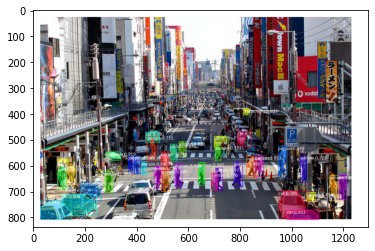

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('output.png')
imgplot = plt.imshow(img)
plt.show()

## Cách tuần tự bài toán của nhóm: 
![image.png](https://dothanhblog.files.wordpress.com/2019/12/fpn-top-down-with-bottom-up.jpg.png?w=1108))

- Nhóm chọn song song C1 trong bottom up của mạng FPN:
  
 - Trong bài toán gốc, tác giả sử dụng Keras Layer để build mô hình, sau đó ảnh input sẽ được tuần tự đi qua các layer mà tác giả đã sắp xếp sẵn.

 - Ý tưởng của nhóm là viết hàm xử lý tuần tự, rồi cho ảnh input qua hàm đó trước khi cho vào model của keras (trong Keras sẽ xoá các layer tương ứng mà nhóm đã viết hàm tuần tự).

 - Output của các hàm tự viết sẽ phải giống output của các layer Keras tương ứng.


 

- Trong C1 có các thao tác sau:
 - Zerropadding2D
 - Convolution2D
 - Batch normilization
 - Relu activation
 - Padding before maxpool.
 - Maxpool2D.

### Resnet C1



1. Convolution
- Ở lớp tích chập (convolution layer), thay vì kết nối toàn bộ điểm ảnh, tầng này sẽ sử dụng các bộ lọc (filters) có kích thước nhỏ hơn rất nhiều so với ảnh input (thường là 3x3, 5x5 hoặc 7x7). Các bộ lọc này sẽ được áp vào một vùng trong ảnh và tính tích chập giữa bộ lọc và các điểm ảnh tại vùng đó.
Bộ lọc (filter): có thể thấy đây là một ma trận có kích thước m x n.

- Phép tích chập sẽ được thực hiện như sau: bộ lọc sẽ được trượt qua ảnh input theo một giá trị bước trượt (stride) bắt đầu từ góc trái trên cùng của ảnh chạy dọc theo ảnh sao cho quét được hết toàn bộ ảnh. Ở một lần trượt sẽ thực hiện tính toán kết quả mới cho điểm ảnh đang xét bằng công thức tích chập.
- Giả sử ta thực hiện phép tích chập với ảnh đầu vào là một hình ảnh 2D và ma trận bộ lọc có kích thước 3x3: 

<br>

![image.png](https://i.morioh.com/200711/d2cc13d4.jpg)

<br>

- Ví dụ trên được thực hiện với hình ảnh 2D, nhưng trong thực tế nhiều bài toán đòi hỏi phải làm việc với hình ảnh 3D được biểu diễn như một ma trận 3D với kích thước: chiều rộng, chiều cao và chiều sâu (chiều sâu tương ứng với 3 kênh màu RGB). Một bộ lọc có chiều rộng và chiều cao cụ thể như 3 x 3 hay 5 x 5 và để áp dụng cho hình ảnh 3D cần thực hiện nhiều phép toán tích chập tương ứng với nhiều bộ lọc khác nhau để tạo ra nhiều bản đồ tính năng, sau đó gộp các bản đồ đặc trưng (feature map) này lại với nhau để trở thành đầu ra cuối cùng của lớp tích chập (convolutional layer).

- Stride: là số điểm ảnh thay đổi trên ma trận đầu vào, khi stride bằng 1 thì  ta di chuyển bộ lọc 1 điểm ảnh. Khi stride bằng 2 thi ta di chuyển bộ lọc đi 2 điểm ảnh và tiếp tục như vậy cho đến khi bộ lọc đã trượt qua toàn bộ ảnh.

<br>

2. Zeropadding2D
- Zero padding có tác dụng giữ kích thước cho output của thao tác convolution không bị giảm hoặc làm cho output có kích thước mong muốn.

- Ví dụ: 
![image.png](https://miro.medium.com/freeze/max/800/1*O06nY1U7zoP4vE5AZEnxKA.gif)

<br>

3. Batch Normalization (BN)
- BN là một phương pháp được sử dụng để làm cho mạng nơ-ron nhân tạo nhanh hơn và ổn định hơn thông qua việc chuẩn hóa đầu vào của các lớp bằng cách căn giữa và chia tỷ lệ lại. dữ liệu được chuẩn hóa về dạng (0, 1).
- Đối với phần BN của C1 thì model đã được train gồm bốn list các giá trị là beta, gamma, moving_mean, moving_variance. Mỗi list sẽ gồm 64 phần tử tương ứng cho shape output sau khi thực hiện phép convolution (1, 512, 512, 64)
- Mỗi phần tử sẽ được chuẩn hoá theo công thức: 
        X_hat  =  (X – moving_mean) / sqrt(moving_variance)
        X = gamma *  X_hat + beta.  


4. ReLu Activation (Rectified Linear Unit):
-  Công thức: f(x) = max(x,0)
-  ReLU là hàm kích hoạt trong Neural Network, với chức năng lọc các giá trị < 0. Giá trị được trả ra là 0 nếu đầu vào nhỏ hơn 0, nếu giá trị > 0 thì giá trị sẽ được giữ nguyên

<br>

5. Max Pooling
-  Lớp Pooling làm giảm các tham số khi kích thước ảnh quá lớn. Trong các pooling, Max Pooling là một loại phổ biến, dùng để làm giảm số feature của ảnh đầu vào thông qua việc lấy phần từ lớn nhất của ma trận đối tượng.

-  Ví dụ: Ta có input với kích thước 4x4. Để filter giảm các tham số cho ra output là 2x2 với bước nhảy (Stride - (2,2)), ta lấy ra giá trị lớn nhất trong một ma trận đối tượng với kích thước 2x2: Trong ma trận top left, ta giá trị lớn nhất là 9; tương tự là 7,8,6 tương ứng các ma trận top right, bot left, bot right.
![image.png](https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png)

<br>

6. Padding for Max Pooling
-  Trong các trường hợp ảnh input có kích thước không fit với kích thước kernel và stride của pooling layer. Padding trong Max Pooling được áp dụng để xử lý kích thước ảnh sao cho phù hợp và fit với kích thước của kernel.

- Ví dụ: Khi input có kích thước 5x5, tuy nhiên output trả ra có kích thước là 2x2 và kernel có kích thước là 2x2, ta phải thêm các padding vào input để cho ra kích thước phù hợp
 
 ![image.png](https://i.stack.imgur.com/NFQKa.jpg)


### Sequential inference stage

In [28]:
%%time
!python inference3.py

#!pwd

Using TensorFlow backend.


2022-06-26 04:19:21.763781: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2022-06-26 04:19:21.763980: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x68a9f80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-26 04:19:21.764009: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-06-26 04:19:21.765595: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-06-26 04:19:21.991489: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-26 04:19:21.992273: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x68aa300 initialized for platform CUDA (this does not guarantee that XLA will be used). 

Populating the interactive namespace from numpy and matplotlib


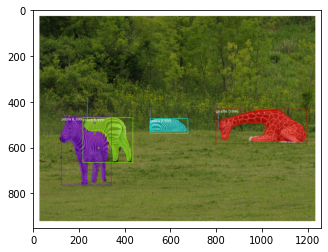

In [29]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('output_host_jit.png')
imgplot = plt.imshow(img)
plt.show()

## Parallel inference stage.

### Ý tưởng song song hoá
- ZeroPadding:
  + Đầu tiên tạo mảng output có kích thước dựa vào số padding (out_w, out_h) = (in_w, in_h) + 2*padding. Các pixel của output = 0.
  + Sau đó, cho 1 grid có số thread bằng kích thước input. Với mỗi r, c của input, ta sẽ gán nó bằng r+padding, c+padding của output.

- Convolution:
 + Đầu tiên tạo mảng output có kích thước, và có giá trị bằng 0. 
    
          out_h = int((img_h - f) / stride) + 1  
          out_w = int((img_h - f) / stride) + 1
 + grid size 3 chiều đại diện cho output, với chiều thứ 3 bằng số lượng  input filter.
 + với mỗi input filter sẽ có 3 channel, ta sẽ nhân chập 3 channel này tương ứng với 3 channel của input rồi cộng 3 kết quả này lại rồi lại + cho bias ta sẽ được kết quả convolution của 1 filter (làm tương tự với các filter còn lại).

- batchNorm:
  + trong batchNorm mỗi pixel sẽ được áp dụng công thức (được trình bày ở trên) nên mỗi thread sẽ đảm nhiệm phần tính toán của 1 pixel 

- Relu activation:
 + mỗi thread sẽ chịu trách nhiệm tính toán cho một pixel output

- PaddingBeforeMaxpool:
  + Đầu tiên tạo mảng output có kích thước dựa vào số padding (out_w, out_h) = (in_w, in_h) + 1. Các pixel của output = 0.
  + Sau đó, cho 1 grid có số thread bằng kích thước input. Với mỗi r, c của input, ta sẽ gán nó bằng r, c của output.

- Maxpool:
 + Đầu tiên tạo mảng output có kích thước, và có giá trị bằng 0. 
    
          out_h = int((img_h - pool_size + 1) / stride) + 1  
          out_w = int((img_h - pool_size + 1) / stride) + 1
 + Tương tự Convolution, mỗi thread sẽ tính toán giá trị mỗi pixel trong output, với mỗi giá trị r, c ta sẽ tính được nơi đặt cửa sổ trượt.
 + Trong cửa sổ trượt này, ta sẽ lấy giá trị max để làm giá trị của output.

In [ ]:
!nvidia-smi

Thu Jun 23 15:42:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from numba import cuda
cuda.detect()

Found 1 CUDA devices
id 0             b'Tesla T4'                              [SUPPORTED]
                      compute capability: 7.5
                           pci device id: 4
                              pci bus id: 0
Summary:
	1/1 devices are supported


True

In [ ]:
%%time
!python parallel1.py

Using TensorFlow backend.


2022-06-23 15:56:11.618400: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-06-23 15:56:11.618615: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5ceff80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-23 15:56:11.618647: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-06-23 15:56:11.620513: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-06-23 15:56:11.824701: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 15:56:11.825518: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5cf0300 initialized for platform CUDA (this does not guarantee that XLA will be used). 

## Parallel optimization
### Ý tưởng
- Trong phiên bản 1, khi gọi hàm kernel sẽ tự copy các tham số lên bộ nhớ của device để tính toán và tự copy về lại bộ nhớ của host sau khi thực hiện xong.

- Các thao tác được thực hiện nối tiếp nhau (output của thao tác này sẽ là input cho thao tác kế tiếp) nên ta có thể giữ kết quả đó trên bộ nhớ device để sẵn sàng cho thao tác tiếp theo mà không cần phải copy device->host rồi lại host->device.

In [ ]:
%%time
!python parallel2.py

Using TensorFlow backend.


2022-06-19 02:25:20.446576: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2022-06-19 02:25:20.446772: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6c93f80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-19 02:25:20.446803: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-06-19 02:25:20.448389: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-06-19 02:25:20.661592: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 02:25:20.662348: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6c94300 initialized for platform CUDA (this does not guarantee that XLA will be used). 

## So sánh thời gian phiên bản tuần tự(@jit(cache=True)) và 2 phiên bản parallel.

![image.png](https://scontent.fsgn5-8.fna.fbcdn.net/v/t1.15752-9/287494480_724786838767979_3243073695875270715_n.png?_nc_cat=109&ccb=1-7&_nc_sid=ae9488&_nc_ohc=INjG56ASYusAX83Vv7M&_nc_ht=scontent.fsgn5-8.fna&oh=03_AVIQrHOnm7mQJepgjM-mSO8D2OdCk7sQajEehDhn8Tk2yg&oe=62D3C7E1)

<br>


![image.png](https://scontent.fsgn5-15.fna.fbcdn.net/v/t1.15752-9/283554632_1098569777402105_8294746283656715190_n.png?_nc_cat=111&ccb=1-7&_nc_sid=ae9488&_nc_ohc=LVTkm8q9WGcAX9W5AvP&_nc_ht=scontent.fsgn5-15.fna&oh=03_AVKPEKO23iWaLiogn3IuVwGfj-Jp4hnuE_gIx13ey8OTQw&oe=62D3CA84)


## Tài liệu tham khảo
- https://jonathan-hui.medium.com/understanding-feature-pyramid-networks-for-object-detection-fpn-45b227b9106c
- https://keras.io/api/layers/convolution_layers/convolution2d/
- https://datascience.stackexchange.com/questions/67334/whats-the-purpose-of-padding-with-maxpooling
- https://www.youtube.com/watch?v=oWR7--o4no8
- https://viblo.asia/p/gioi-thieu-mang-resnet-vyDZOa7R5wj

## Khó khăn gặp phải.
 - Ít kinh nghiệm thực hành với Keras nên nhóm tốn nhiều thời gian để hiểu cách Keras vận hành.

 - Vì source code dài nên nhóm không thể viết tuần tự toàn bộ từ đầu và chỉ có thể viết tuần tự lại 1 phần nhỏ. Hơn nữa, tác giả sử dụng Keras layer cho hầu hết các thao tác, việc nghiên cứu phương pháp tách 1 phần để viết tuần tự sau đó đưa lại vào model Keras cũng tốn rất nhiều thời gian => mất phương hướng trong thời gian đầu làm đồ án.

 - Convolution với nhiều tham số mới (stride, n_filter, channels, bias): Trên mạng hầu hết các nguồn tham khảo về convolution đều ở trường hợp căn bản nhất (1 input 2D và 1 filter 2D) => nhóm mất nhiều thời gian mày mò.

 - Các thành viên trong nhóm phải chia thời gian cho nhiều việc khác.